# Exercise 1.

In [66]:
import torch
import torchvision  # To be able to access standard datasets more easily
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np  # To plot and display stuff
import torch.optim as optim  # Where the optimization modules are
import urllib.request
from random import randint
from mlxtend.data import loadlocal_mnist
import platform

# Using torchvision we can conveniently load some datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Extract tensor of data and labels for both the training and the test set
x, y = trainset.data.float(), trainset.targets
x_test, y_test = testset.data.float(), testset.targets

### Q1
Try to load the same data directly from the "MINST database" website [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

Be careful that the images can have a different normalization and encoding

In [59]:
import gzip
import shutil
import wget


trainset_images = wget.download("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "train-images-idx3-ubyte.gz")

trainset_labels = wget.download("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", "train-labels-idx1-ubyte.gz")

testset_images = wget.download("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", "t10k-images-idx3-ubyte.gz")

testset_labels = wget.download("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", "t10k-labels-idx1-ubyte.gz")

filenames = ["train-images-idx3-ubyte", "train-labels-idx1-ubyte", "t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte"]

for f in filenames:
    with gzip.open(f+'.gz', 'rb') as f_in:
        with open(f, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

x_train_download, y_train_download = loadlocal_mnist(
            images_path='train-images-idx3-ubyte',
            labels_path='train-labels-idx1-ubyte')

x_test_download, y_test_download = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte',
            labels_path='t10k-labels-idx1-ubyte')

In [67]:
# Transform labels to one_hot encoding
y_one_hot = torch.nn.functional.one_hot(y.to(torch.int64), num_classes=10).float()
y_test_one_hot = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=10).float()

### Q2
Using the utilities in plt and numpy display some images and check that the corresponding labels are consistent

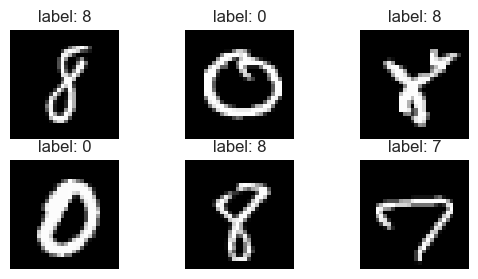

In [68]:
max_image_index = trainset.data.shape[0] - 1
n_images_to_show = 6
for i in range(0, n_images_to_show):
    image_idx = randint(0, max_image_index) # pick a random image from our dataset
    image, label = trainset[image_idx]
    plt.subplot(int(n_images_to_show/2),int(n_images_to_show/2), i+1)
    plt.imshow(image.numpy()[0], cmap='gray')
    plt.axis("off")
    plt.title("label: " + str(label))
plt.show()

### Q3
Complete the code below so to have a MLP with one hidden layer with 300 neurons
Remember that we want one-hot outputs

In [70]:
# Now let us define the neural network we are using
image_size = trainset.data.shape[1] * trainset.data.shape[2]
net = torch.nn.Sequential(
    torch.nn.Linear(image_size, 300),
    torch.nn.Sigmoid(),
    torch.nn.Linear(300, 10),
)

# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

### Q4
Complete the code below to perform a GD based optimization

In [71]:
for k in range(100):
    optimizer.zero_grad()

    inputs = torch.flatten(x, start_dim=1, end_dim=2)
    outputs = net(inputs)
    labels = y_one_hot

    # Define the empirical risk
    Risk = loss(outputs, labels)

    # Make the backward step (1 line instruction)
    Risk.backward()

    # Update the parameters (1 line instruction)
    optimizer.step()

    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk.item())

k= 0    Risk =  2.334929943084717
k= 1    Risk =  2.023409366607666
k= 2    Risk =  1.796834945678711
k= 3    Risk =  1.6189689636230469
k= 4    Risk =  1.4721187353134155
k= 5    Risk =  1.3495150804519653
k= 6    Risk =  1.2471963167190552
k= 7    Risk =  1.1602267026901245
k= 8    Risk =  1.0863076448440552
k= 9    Risk =  1.021930456161499
k= 10    Risk =  0.9663715958595276
k= 11    Risk =  0.9177448153495789
k= 12    Risk =  0.8755163550376892
k= 13    Risk =  0.8375962972640991
k= 14    Risk =  0.8043063282966614
k= 15    Risk =  0.7738298177719116
k= 16    Risk =  0.7465540766716003
k= 17    Risk =  0.7213453054428101
k= 18    Risk =  0.6989140510559082
k= 19    Risk =  0.6776754260063171
k= 20    Risk =  0.6586491465568542
k= 21    Risk =  0.6403164863586426
k= 22    Risk =  0.6239229440689087
k= 23    Risk =  0.6075869202613831
k= 24    Risk =  0.5929317474365234
k= 25    Risk =  0.5786030888557434
k= 26    Risk =  0.565598726272583
k= 27    Risk =  0.5531408190727234
k= 28  

In [71]:
for k in range(100):
    optimizer.zero_grad()

    inputs = torch.flatten(x, start_dim=1, end_dim=2)
    outputs = net(inputs)
    labels = y_one_hot

    # Define the empirical risk
    Risk = loss(outputs, labels)

    # Make the backward step (1 line instruction)
    Risk.backward()

    # Update the parameters (1 line instruction)
    optimizer.step()

    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk.item())

k= 0    Risk =  2.334929943084717
k= 1    Risk =  2.023409366607666
k= 2    Risk =  1.796834945678711
k= 3    Risk =  1.6189689636230469
k= 4    Risk =  1.4721187353134155
k= 5    Risk =  1.3495150804519653
k= 6    Risk =  1.2471963167190552
k= 7    Risk =  1.1602267026901245
k= 8    Risk =  1.0863076448440552
k= 9    Risk =  1.021930456161499
k= 10    Risk =  0.9663715958595276
k= 11    Risk =  0.9177448153495789
k= 12    Risk =  0.8755163550376892
k= 13    Risk =  0.8375962972640991
k= 14    Risk =  0.8043063282966614
k= 15    Risk =  0.7738298177719116
k= 16    Risk =  0.7465540766716003
k= 17    Risk =  0.7213453054428101
k= 18    Risk =  0.6989140510559082
k= 19    Risk =  0.6776754260063171
k= 20    Risk =  0.6586491465568542
k= 21    Risk =  0.6403164863586426
k= 22    Risk =  0.6239229440689087
k= 23    Risk =  0.6075869202613831
k= 24    Risk =  0.5929317474365234
k= 25    Risk =  0.5786030888557434
k= 26    Risk =  0.565598726272583
k= 27    Risk =  0.5531408190727234
k= 28  

### Q5
Compute the final accuracy on test set

In [45]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean() * 100

In [75]:
from sklearn.metrics import accuracy_score

predict_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
acc = accuracy(predict_test, y_test)
print(f"Initial Accuracy: {acc} %")

acc2 = accuracy_score(torch.argmax(predict_test, dim=1), y_test)
print(f"Initial Accuracy II: {acc2*100} %")

Initial Accuracy: 91.98999786376953 %
Initial Accuracy II: 91.99000000000001 %


# Exersice 2

### Q1
**On line 49 of the code it is commented that we want to perform a GD based optimization. However, on line 45 we invoked optim.SGD as the optimizer. Explain why in this case we are still performing a gradient**


Yes, we are indeed performing Gradient Descent (GD) because in the code in Q4, where we invoked the SGD optimizer, we are passing the entire training dataset to our optimizer (no batches involved). However, it would have been stochastic gradient descent (SGD) optimization if we passed our inputs as batches, but this is not the case.

In SGD we are still performing a gradient, the only difference with GD is that the loss function in SGD is only calculated for a minibatch of our data. We do this in order to simplify the derivative of the loss function and make the process less computationally expensive.

### Q2

**Discuss over-fitting issues by monitoring the train and test error curves.**

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

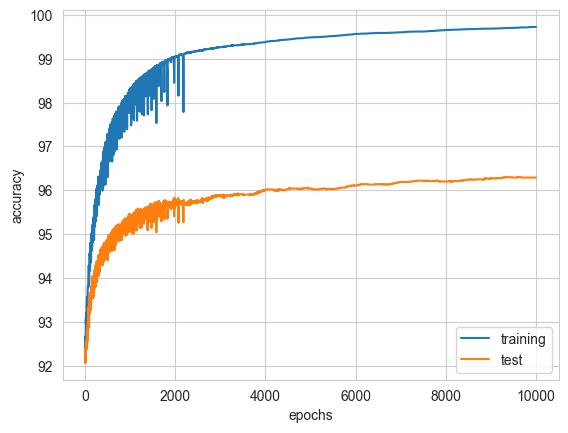

CPU times: total: 18h 49min 25s
Wall time: 4h 44min 49s


In [47]:
%%time
n_epochs = 10000
train_accs = []
test_accs = []
for k in range(n_epochs):
    print(k)
    optimizer.zero_grad()
    inputs = torch.flatten(x, start_dim=1, end_dim=2)
    outputs = net(inputs)
    labels = y_one_hot

    # Define the empirical risk
    Risk = loss(outputs, labels)
    # Make the backward step
    Risk.backward()
    # Update the parameters
    optimizer.step()

    with torch.no_grad():
        train_prediction = net(torch.flatten(x, start_dim=1, end_dim=2))
        train_acc = accuracy(train_prediction, y)
        train_accs.append(train_acc)

        test_prediction = net(torch.flatten(x_test, start_dim=1, end_dim=2))
        test_acc = accuracy(test_prediction , y_test)
        test_accs.append(test_acc)


epochs = np.arange(0, n_epochs)
plt.plot(epochs, train_accs, label='training')
plt.plot(epochs, test_accs, label='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

We are in the model interpolating paradigm. we don't see any overfitting . <overfitting when the training error goes up and the test goes down

### Q3
**Discuss what role does the choice of the network (i.e. number of layers and number of neurons per layer) have on the bias-variance trade-off. First describe your expectations based on theoretical analysis (arguing on the different capacity of the models) then test these expectations with a small experimental campaign. Is the expected behaviour confirmed by experimental results? Briefly discuss your findings.**

##### Theoretical Analysis


The bias and variance tradeoff depends primarily on the testing risk and training risk. The model is said to be under-fitting if there is high training and testing risk, and it is said to be over-fitting if the test risk is very high while the training risk is very low. Our aim is to find the sweet spot between under-fitting and over-fitting by varying the capacity (complexity) of the model.

As we have already seen in the lecture, in theory:

* Classical regime: the **ML** model is expected to have a very high bias and small variance (under-fitting) for a low capacity model and the model exhibits a small bias and large variance (over-fitting) when the model capacity is very high. But it is possible to find the sweet spot by finding an optimal capacity.

* Modern interpolating regime: even here the model is expected to behave similarly as in the classical regime, but after a certain high capacity (deep networks) it seems that it is possible to have a model with perfect fitting on the training data and test data at the same time, thereby achieving better model generalization.

Refer to the attached figure:

![Image](https://miro.medium.com/max/1400/1*xPeh_NHGHbTmURrGWBNHKw.png)

*source https://arxiv.org/pdf/1812.11118.pdf*

##### Let's check how the risk changes in the training and testing sets as the number of neurons increases

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


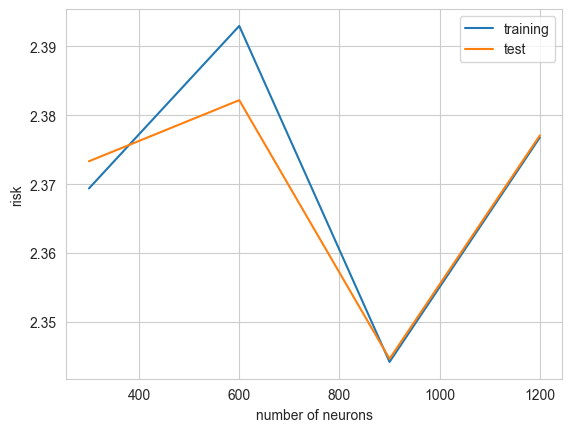

In [78]:
n_epochs = 50
train_risks = []
test_risks = []
n_neurons = [300, 600, 900, 1200]
for n in n_neurons:
    net = torch.nn.Sequential(
        torch.nn.Linear(image_size, n),
        torch.nn.Sigmoid(),
        torch.nn.Linear(n, 10),
    )
    for k in range(n_epochs):
        print(k)
        optimizer.zero_grad()
        inputs = torch.flatten(x, start_dim=1, end_dim=2)
        outputs = net(inputs)
        labels = y_one_hot

        # Define the empirical risk
        Risk = loss(outputs, labels)
        # Make the backward step
        Risk.backward()
        # Update the parameters
        optimizer.step()

    with torch.no_grad():
        train_risk = Risk.item()
        train_risks.append(train_risk)

        test_prediction = net(torch.flatten(x_test, start_dim=1, end_dim=2))
        test_risk = loss(test_prediction, y_test)
        test_risks.append(test_risk)

plt.plot(n_neurons, train_risks, label='training')
plt.plot(n_neurons, test_risks, label='test')
plt.legend()
plt.xlabel("number of neurons")
plt.ylabel("risk")
plt.show()


The best network configuration here would be with XX neurons because...

##### Let’s check how the risk changes in the training and testing sets as we increase the number of layers

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


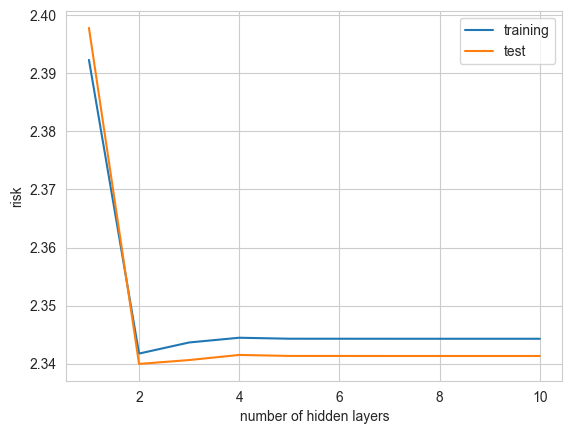

CPU times: total: 10min 26s
Wall time: 3min 7s


In [83]:
%%time
n_epochs = 3
n_neurons = 300
train_risks = []
test_risks = []
layers = [torch.nn.Linear(image_size, n_neurons), torch.nn.Sigmoid(),torch.nn.Linear(n_neurons, 10)]
linear_layer = torch.nn.Linear(n_neurons, n_neurons)
activation_function = torch.nn.Sigmoid()
n_hidden_layers = np.arange(1,11,1)
for l in n_hidden_layers:
    if l!=1:
        layers.insert(2,linear_layer)
        layers.insert(3,activation_function)
    net = torch.nn.Sequential(*layers)
    for k in range(n_epochs):
        print(k)
        optimizer.zero_grad()
        inputs = torch.flatten(x, start_dim=1, end_dim=2)
        outputs = net(inputs)
        labels = y_one_hot

        # Define the empirical risk
        Risk = loss(outputs, labels)
        # Make the backward step
        Risk.backward()
        # Update the parameters
        optimizer.step()

    with torch.no_grad():
        train_risk = Risk.item()
        train_risks.append(train_risk)

        test_prediction = net(torch.flatten(x_test, start_dim=1, end_dim=2))
        test_risk = loss(test_prediction, y_test).item()
        test_risks.append(test_risk)

plt.plot(n_hidden_layers, train_risks, label='training')
plt.plot(n_hidden_layers, test_risks, label='test')
plt.legend()
plt.xlabel("number of hidden layers")
plt.ylabel("risk")
plt.show()

Looking at our graph, we can say that the best configuration for our network is with 3 hidden layers , adding

##### Let's check what the best combination of neurons and layers is:

In [88]:
import matplotlib.cm as cm
cm.rainbow(np.linspace(0, 1, 5))

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

0
1
2


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

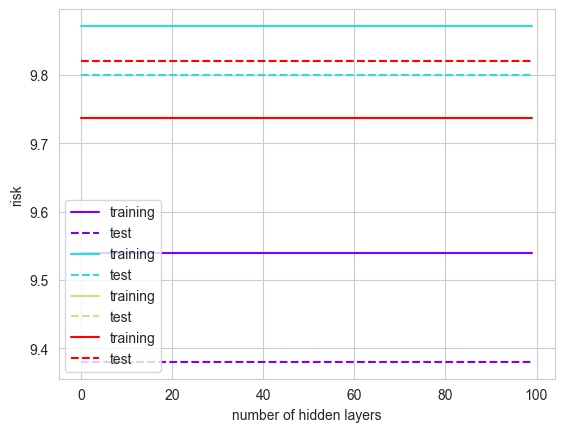

CPU times: total: 3h 37min 38s
Wall time: 55min 4s


In [100]:
%%time
import matplotlib.cm as cm
n_epochs = 100
epochs = np.arange(0, n_epochs, 1)
n_neurons = [300, 900]
train_risks = []
test_risks = []
n_hidden_layers = [2,6]

activation_function = torch.nn.Sigmoid()

n_configurations = len(n_neurons)*len(n_hidden_layers)
color_array = cm.rainbow(np.linspace(0,1,n_configurations))
conf_idx = 0
for n in n_neurons:
    layers = [torch.nn.Linear(image_size, n), torch.nn.Sigmoid(),torch.nn.Linear(n, 10)]
    linear_layer = torch.nn.Linear(n, n)
    for l in n_hidden_layers:
        if l!=1:
            layers.insert(2,linear_layer)
            layers.insert(3,activation_function)
        net = torch.nn.Sequential(*layers)
        train_accs = []
        test_accs = []
        for k in epochs:
            print(k)
            optimizer.zero_grad()
            inputs = torch.flatten(x, start_dim=1, end_dim=2)
            outputs = net(inputs)
            labels = y_one_hot

            # Define the empirical risk
            Risk = loss(outputs, labels)
            # Make the backward step
            Risk.backward()
            # Update the parameters
            optimizer.step()

            with torch.no_grad():
                train_prediction = net(torch.flatten(x, start_dim=1, end_dim=2))
                train_acc = accuracy(train_prediction, y)
                train_accs.append(train_acc)

                test_prediction = net(torch.flatten(x_test, start_dim=1, end_dim=2))
                test_acc = accuracy(test_prediction , y_test)
                test_accs.append(test_acc)

        plt.plot(epochs, train_accs, label='training', color=color_array[conf_idx])
        plt.plot(epochs, test_accs, label='test', linestyle='dashed', color=color_array[conf_idx])
        conf_idx+=1
plt.legend()
plt.xlabel("number of hidden layers")
plt.ylabel("risk")
plt.show()

### Q4
**Discuss the benefits of using a cross entropy loss with respect to a quadratic loss.**


### Q5
**Why using a one-hot encoding? Wouldn’t be simpler to use a single output? Hint: The answer
has to do with the interplay between the loss and the sigmoidal activation functions**

### Q6

**Test the sensibility of the gradient descent method with respect to the learning rate.**

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


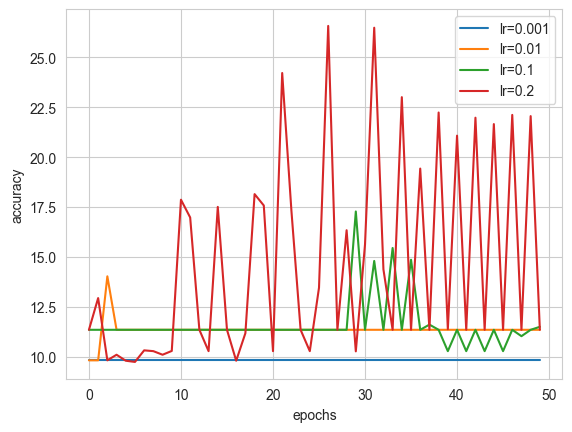

CPU times: total: 3h 15min 9s
Wall time: 52min 32s


In [101]:
%%time
n_epochs = 50
learning_rates = [0.001,0.01,0.1,0.2]
epochs = np.arange(0, n_epochs)

for lr in learning_rates:
    train_accs = []
    test_accs = []
    optimizer = optim.SGD(net.parameters(), lr=lr)
    for k in range(n_epochs):
        print(k)
        optimizer.zero_grad()
        inputs = torch.flatten(x, start_dim=1, end_dim=2)
        outputs = net(inputs)
        labels = y_one_hot

        # Define the empirical risk
        Risk = loss(outputs, labels)
        # Make the backward step
        Risk.backward()
        # Update the parameters
        optimizer.step()

        with torch.no_grad():
            # train_prediction = net(torch.flatten(x, start_dim=1, end_dim=2))
            # train_acc = accuracy(train_prediction, y)
            # train_accs.append(train_acc)

            test_prediction = net(torch.flatten(x_test, start_dim=1, end_dim=2))
            test_acc = accuracy(test_prediction , y_test)
            test_accs.append(test_acc)


    # plt.plot(epochs, train_accs, label='training')
    plt.plot(epochs, test_accs, label=f'lr={lr}')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()